# Pythorch Tutorial:

Till now I didn't work with the MNSIT dataset on any of my ML problems, wierd enough, since this dataset is the big classic for machine learning tutorials, so I'll be using it for this tutorial.

If you don't know about the MNIST dataset, well it's a dataset than contains images of hand written digits from 0 to 9. And the objectif is to predict hand written digits, clear enough. 

With PyTorch we won't be forced to download the dataset elsewhere, and we can do that through torchvision module.

So without further ado let's get right into it!

In [28]:
import torch
import torchvision
from torchvision import transforms,datasets
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# Initializing train/test data:

train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()])) 
# 1st parameter stores the data locally,2nd,3rd self-explanatory and 4th transforms it into a Tensor. 

test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()])) 

100%|████████████████████████████████████████████████████████████████████▊| 9887744/9912422 [01:30<00:00, 79277.65it/s]

Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



0it [00:00, ?it/s]
 57%|█████████████████████████████████████████▍                               | 16384/28881 [00:00<00:00, 93629.39it/s]
32768it [00:00, 50030.58it/s]                                                                                          

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw



0it [00:00, ?it/s]
 99%|███████████████████████████████████████████████████████████████████▌| 1638400/1648877 [00:14<00:00, 199290.33it/s]

Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 20481.29it/s]                                                                                           

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


9920512it [01:50, 79277.65it/s]                                                                                        
1654784it [00:28, 199290.33it/s]                                                                                       

In [4]:
trainset=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

The format of trainset is as follows: 

Each item from it is a list with 2 elements, first elemnet contains batch_size Tensors of values for the images. The second element is a tensor containing the output (correct answers) for those images.

Note that each image is 28x28 with grayscale value between 0 & 1.

In [14]:
for batch in trainset:
    item
    break
    
# Python remembers the last term of a loop which is the first one in this case since we breaked.

In [18]:
item[1][0]

tensor(9)

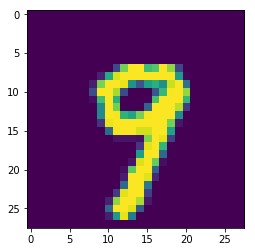

In [17]:
plt.imshow(item[0][0].view(28,28))

One important thing with classification problems is to make sure the data is balanced so to verify that let's see the percentage of each of the 10 classes.

In [24]:
perDict={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
total=0
for batch in trainset:
    y=batch[1]
    for label in y:
        perDict[int(label)]+=1
        total+=1

In [27]:
l={key:100*value/total for key,value in perDict.items()}
print(sum(l.values()))
l

100.0


{0: 9.871666666666666,
 1: 11.236666666666666,
 2: 9.93,
 3: 10.218333333333334,
 4: 9.736666666666666,
 5: 9.035,
 6: 9.863333333333333,
 7: 10.441666666666666,
 8: 9.751666666666667,
 9: 9.915}

Well it's quite balanced and we are not going to have troubles related to unbalanced dataset.

So after we got our data we will now implement our model. Let's start!

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super.__init__()
        